# Related to light yield estimation for PDVD
### --Created by Shuaixiang (Shu)
### --Feb 26, 2025

## The following evaluation scripts are based on 10MeV blip light source
<br />
<br />
<br />


### Read txt files and general output:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


#------------------------------------------
opName = 'opch06'
#------------------------------------------

#read data---
posX = []
posY = []
posZ = []
emulValues = []

with open('./data/{}_xPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posX.append(float(currentPlace))
with open('./data/{}_yPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posY.append(float(currentPlace))
with open('./data/{}_zPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posZ.append(float(currentPlace))
      
with open('./data/{}_emulValues.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        emulValues.append(float(currentPlace))  
        
        
        
        
        
print("Length of posX: ", len(posX))
print("Length of posY: ", len(posY))
print("Length of posZ: ", len(posZ))

print("Length of emulValues: ", len(emulValues))

Length of posX:  591680
Length of posY:  591680
Length of posZ:  591680
Length of emulValues:  591680


In [3]:
print("Max value of emulValues: ", max(emulValues))

#index of the maximum value
max_index = emulValues.index(max(emulValues))

print("Position of max value: (x, y, z) = (", posX[max_index], ",", posY[max_index], ",", posZ[max_index], ")")



Max value of emulValues:  514344.0
Position of max value: (x, y, z) = ( -5.0 , 45.0 , 185.0 )


<br />
<br />
<br />

## PE Yield of certain Z plane:

RATIO:  0.0072

len(XY_y): 6880
len(XY_x):  6880

Size of z145_emul:  6880

len(y_edges): 87
len(x_edges): 81


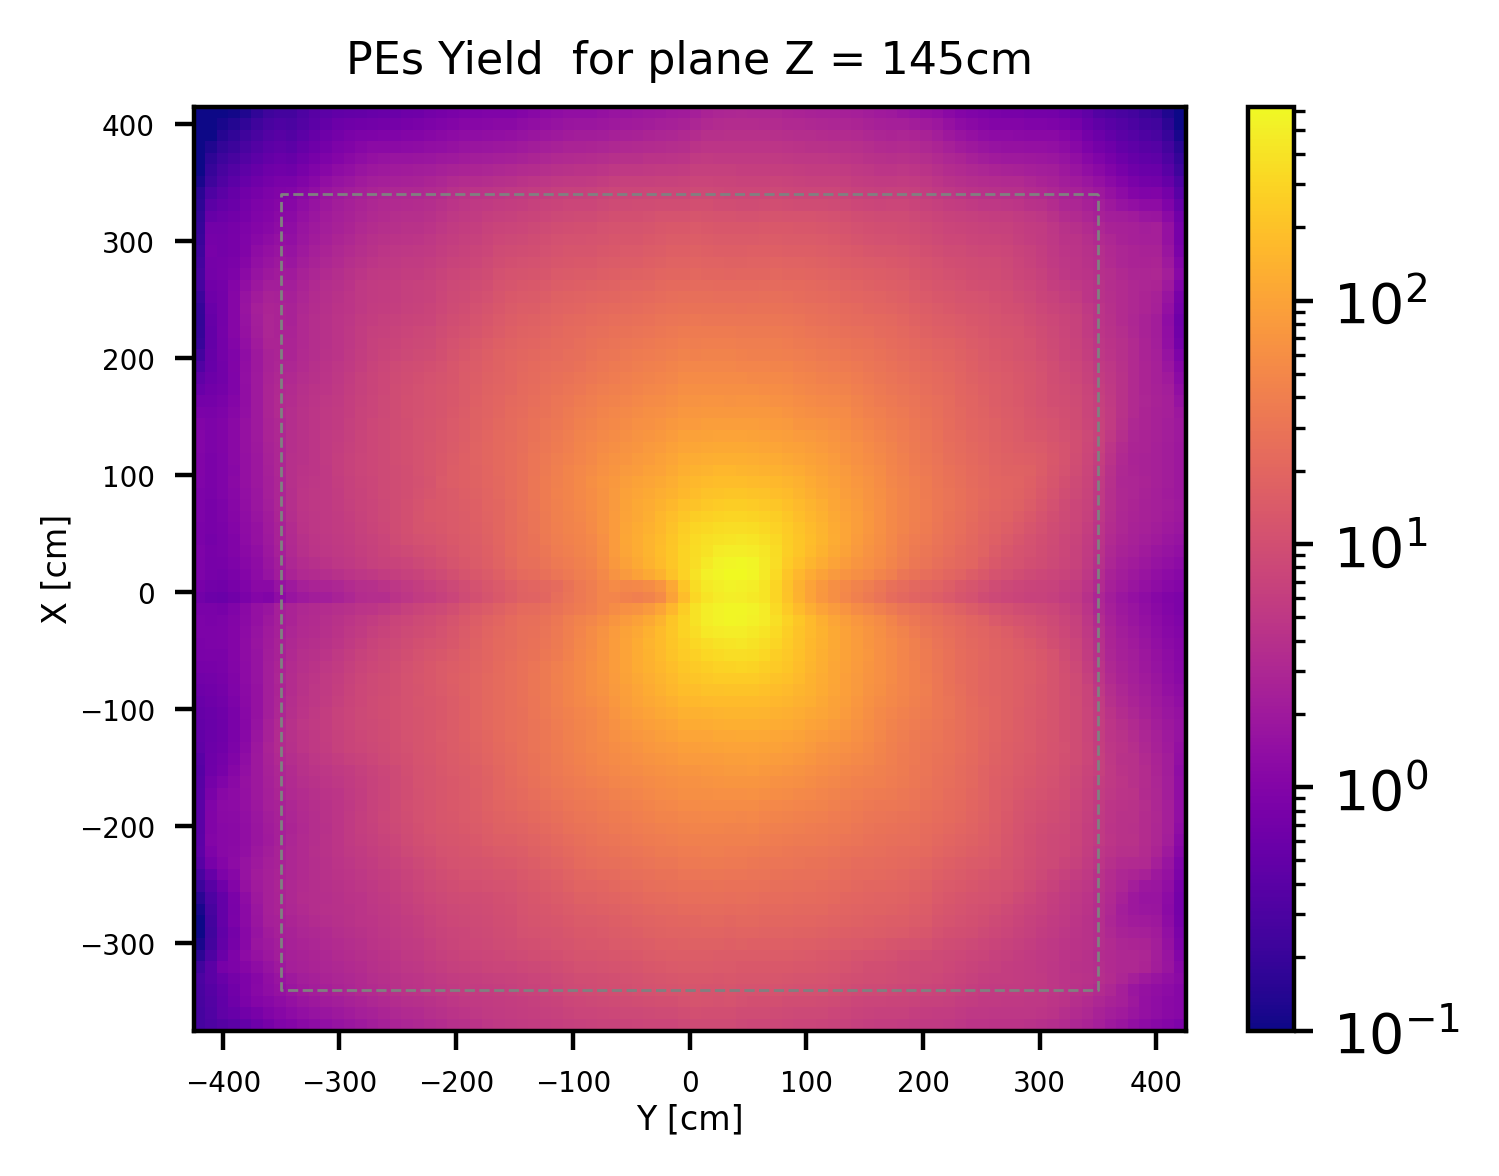

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors



#Calculaiton based on Tinjun's slides (20240708)=======================
#on protoDUNE PDS Sim/Reco meeting=====================================
L = 240000 #Total light yield for E=10MeV; Assuming 24000/MeV---
A = 0.03 #(X-)Arapuca PDE---


ratio = A * L / 1000000
print("RATIO: ", ratio)





#Bin num and range===================================================

# verX:  [-375, -365, -355, -345, -335, -325, -315, -305, -295, -285, -275, -265, -255, -245, -235, -225, -215, -205, -195, 
#        -185, -175, -165, -155, -145, -135, -125, -115, -105, -95, -85, -75, -65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 
#        35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 
#        285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415]

# verY:  [-425, -415, -405, -395, -385, -375, -365, -355, -345, -335, -325, -315, -305, -295, -285, -275, -265, -255, -245, 
#         -235, -225, -215, -205, -195, -185, -175, -165, -155, -145, -135, -125, -115, -105, -95, -85, -75, -65, -55, -45, -35, 
#         -25, -15, -5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 
#         235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425]

# verZ:  [-275, -265, -255, -245, -235, -225, -215, -205, -195, -185, -175, -165, -155, -145, -135, -125, -115, -105, -95, -85, 
#         -75, -65, -55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 
#         185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 
#         415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515, 525, 535, 545, 555, 565, 575]

#Step size along X:  80
#Step size along Y:  86
#Step size along Z:  86
#Total Num of vertex:  591680

x_bins = 80
z_bins = 86
y_bins = 86
x_range = (-375, 415)
z_range = (-275, 575)
y_range = (-425, 425)


#empty 2D array to hold the bin values---
histogram = np.zeros((x_bins, y_bins))#axis y, then axis x---


#XY plane---
#XY_y = list(range(-425, 426, 10))#y list---
#XY_x = list(range(-375, 416, 10))#x list---

XY_y = []
XY_x = []
for i in range(0, x_bins):
    for j in range(0, y_bins):
        XY_x.append(-375 + i*10)
        XY_y.append(-425 + j*10)

print("\nlen(XY_y):", len(XY_y))
print("len(XY_x): ", len(XY_x))
#print("\nlen(XY_y)*len(XY_x): ", len(XY_y)*len(XY_x))


#Store emul values------
#Data storage rule: loop z fastly, then y, at last x---
#For following emulValues, 1st corresponds to (x0, y0), then (x0, y1), (x0, y2)...
z145_emul = []
plane_Z = 145
for i in range(0, len(posZ)):
    if posZ[i] == plane_Z:
        z145_emul.append(emulValues[i])
    else:
        continue

print("\nSize of z145_emul: ", len(z145_emul))


#Fill histogram--------------
for i in range(0, len(XY_x)):
    x_index = int((XY_x[i] + 375) / 10)#physical x, axis y! Starting from 0---
    y_index = int((XY_y[i] + 425) / 10)#physical y, axis x---
    
    histogram[x_index, y_index] = z145_emul[i] * ratio

#edges---
x_edges = np.linspace(x_range[0], x_range[1], x_bins + 1)#physical x---
y_edges = np.linspace(y_range[0], y_range[1], y_bins + 1)#physical y, axis x---

print("\nlen(y_edges):", len(y_edges))
print("len(x_edges):", len(x_edges))




#plot------------------------------------------------------
plt.figure(figsize=(4,3),dpi=400)
norm = mcolors.LogNorm(vmin=0.1, vmax=histogram.max())  # Avoid log(0) issues
pcm = plt.pcolormesh(y_edges, x_edges, histogram, shading='auto', cmap='plasma', norm=norm)
colorbar = plt.colorbar()

#field cage plot---
cageXY_y = [350, -350, -350, 350, 350]
cageXY_x = [340, 340, -340, -340, 340]
plt.plot(cageXY_y, cageXY_x, color="grey", linewidth=0.5, linestyle='--')


plt.ylabel('X [cm]', labelpad=1, fontsize=6)
plt.xlabel('Y [cm]', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

x_tmp = int(plane_Z)
plt.title('PEs Yield  for plane Z = {}cm'.format(x_tmp), fontsize=8)
plt.show()




<br />
<br />
<br />
<br />
<br />
<br />

## PE Distribution in space (For EMUL):

# event in [0, 100]         :  55650
# event in (100, 1000]      :  386663
# event in (1000, 10000]    :  137574
# event in (10000, 100000]  :  11419
# event in (100000, 1000000]:  374

Total event nums            :  591680

list length of [0, 100]         :  55650
list length of (100, 1000]      :  386663
list length of (1000, 10000]    :  137574
list length of (10000, 100000]  :  11419
list length of (100000, 1000000]:  374


length of groupX[ 0 ]:  55650
length of groupY[ 0 ]:  55650
length of groupZ[ 0 ]:  55650
length of groupX[ 1 ]:  386663
length of groupY[ 1 ]:  386663
length of groupZ[ 1 ]:  386663
length of groupX[ 2 ]:  137574
length of groupY[ 2 ]:  137574
length of groupZ[ 2 ]:  137574
length of groupX[ 3 ]:  11419
length of groupY[ 3 ]:  11419
length of groupZ[ 3 ]:  11419
length of groupX[ 4 ]:  374
length of groupY[ 4 ]:  374
length of groupZ[ 4 ]:  374


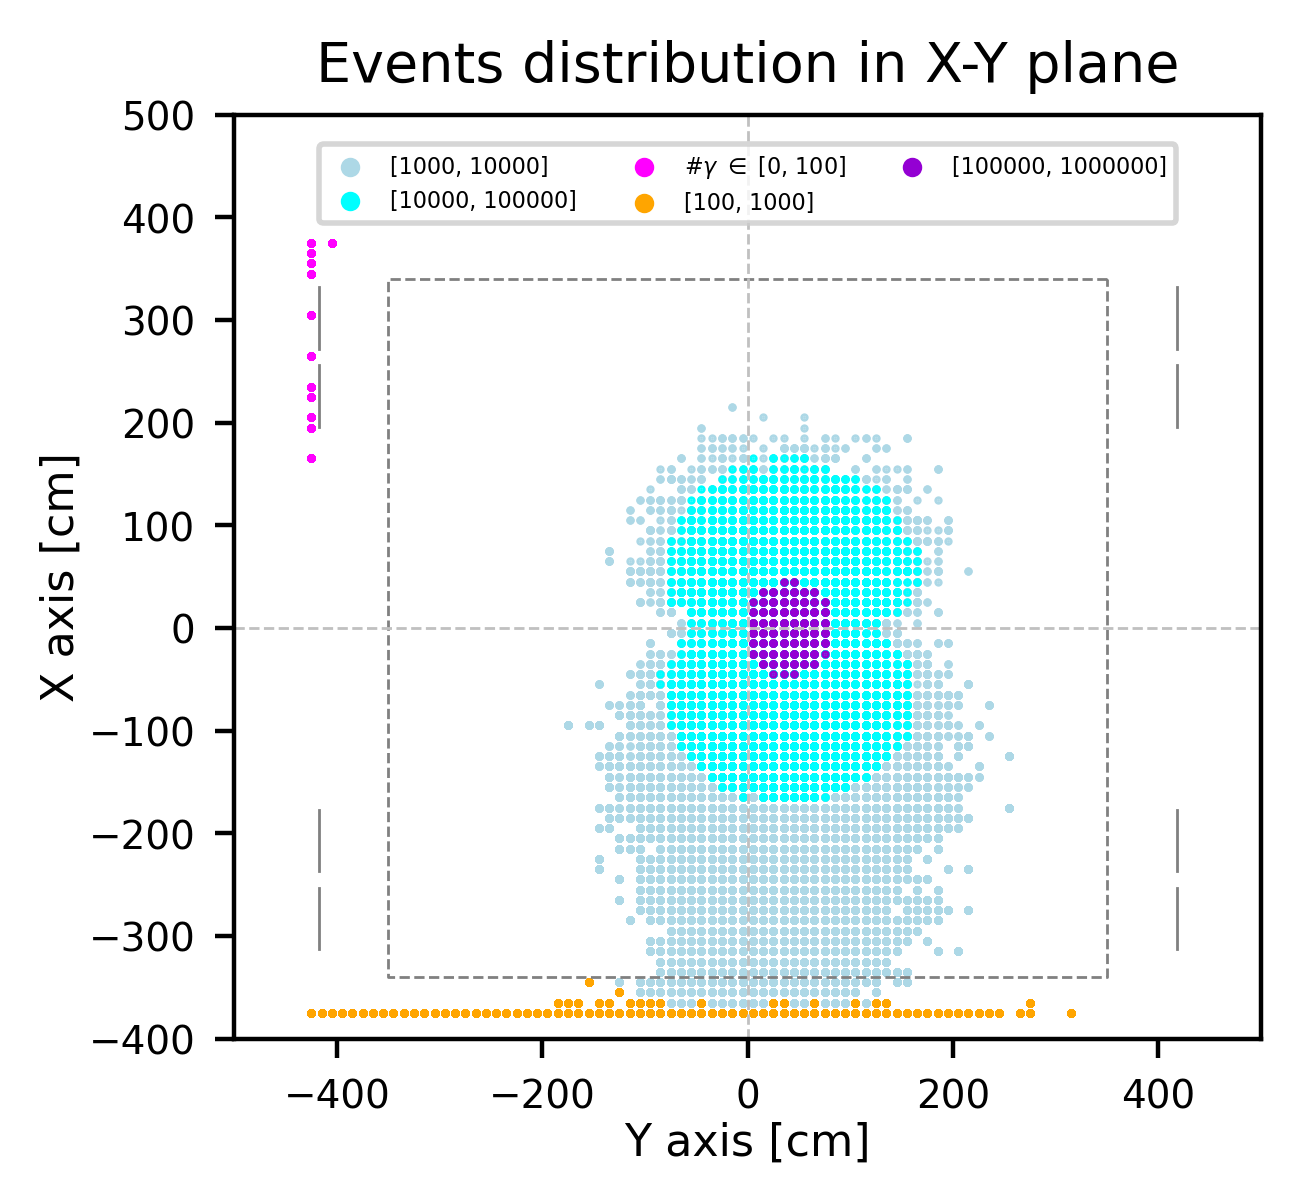

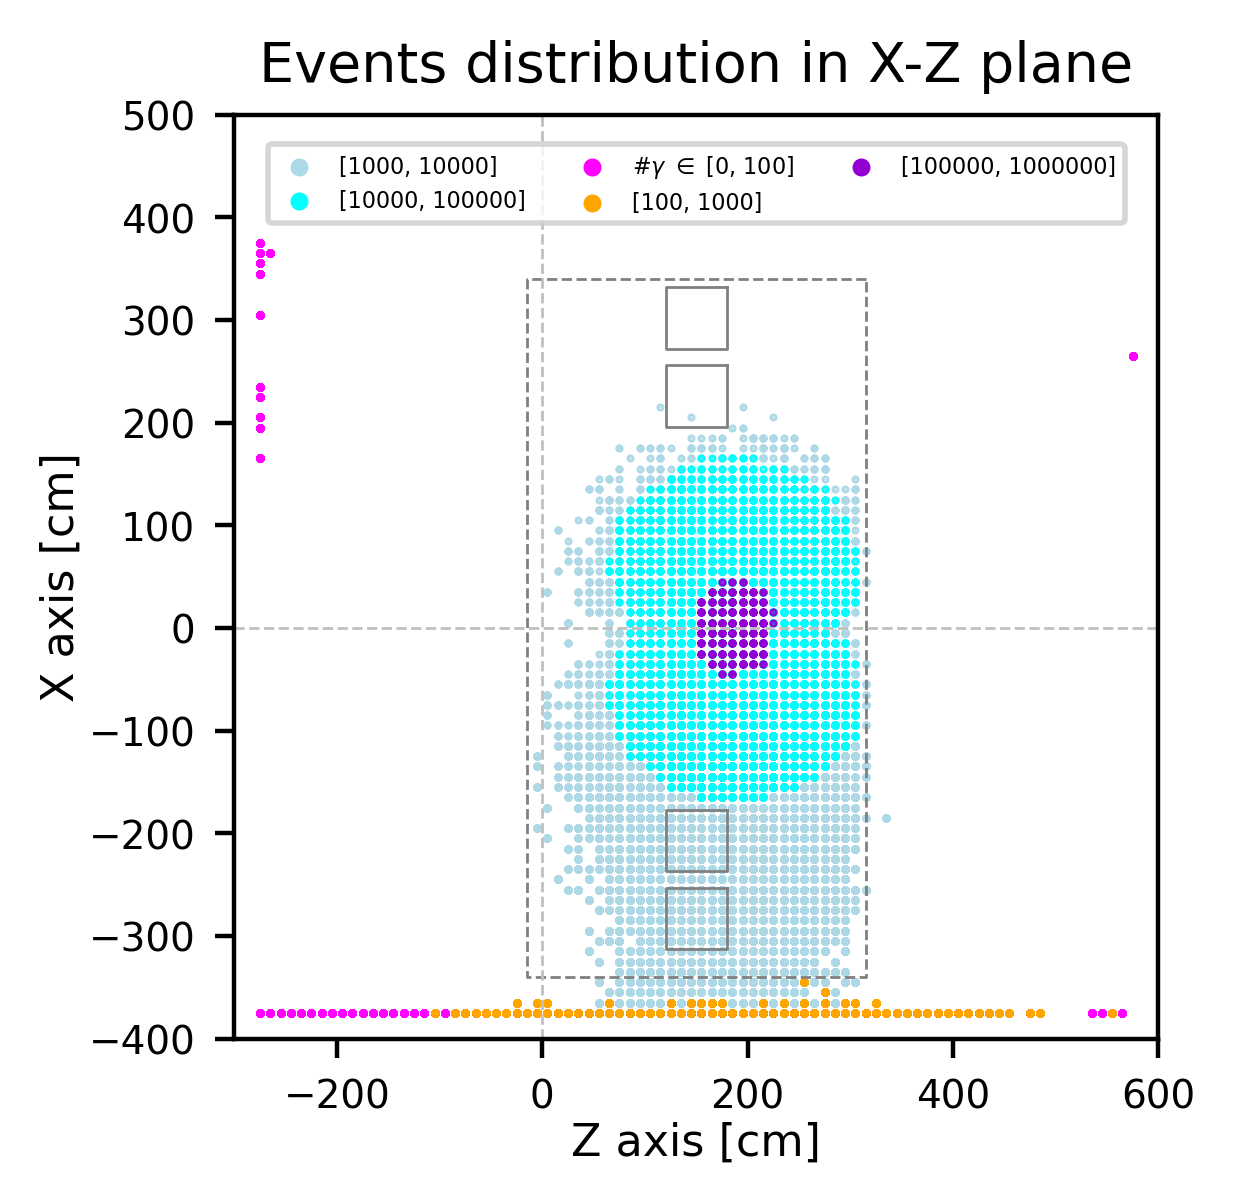

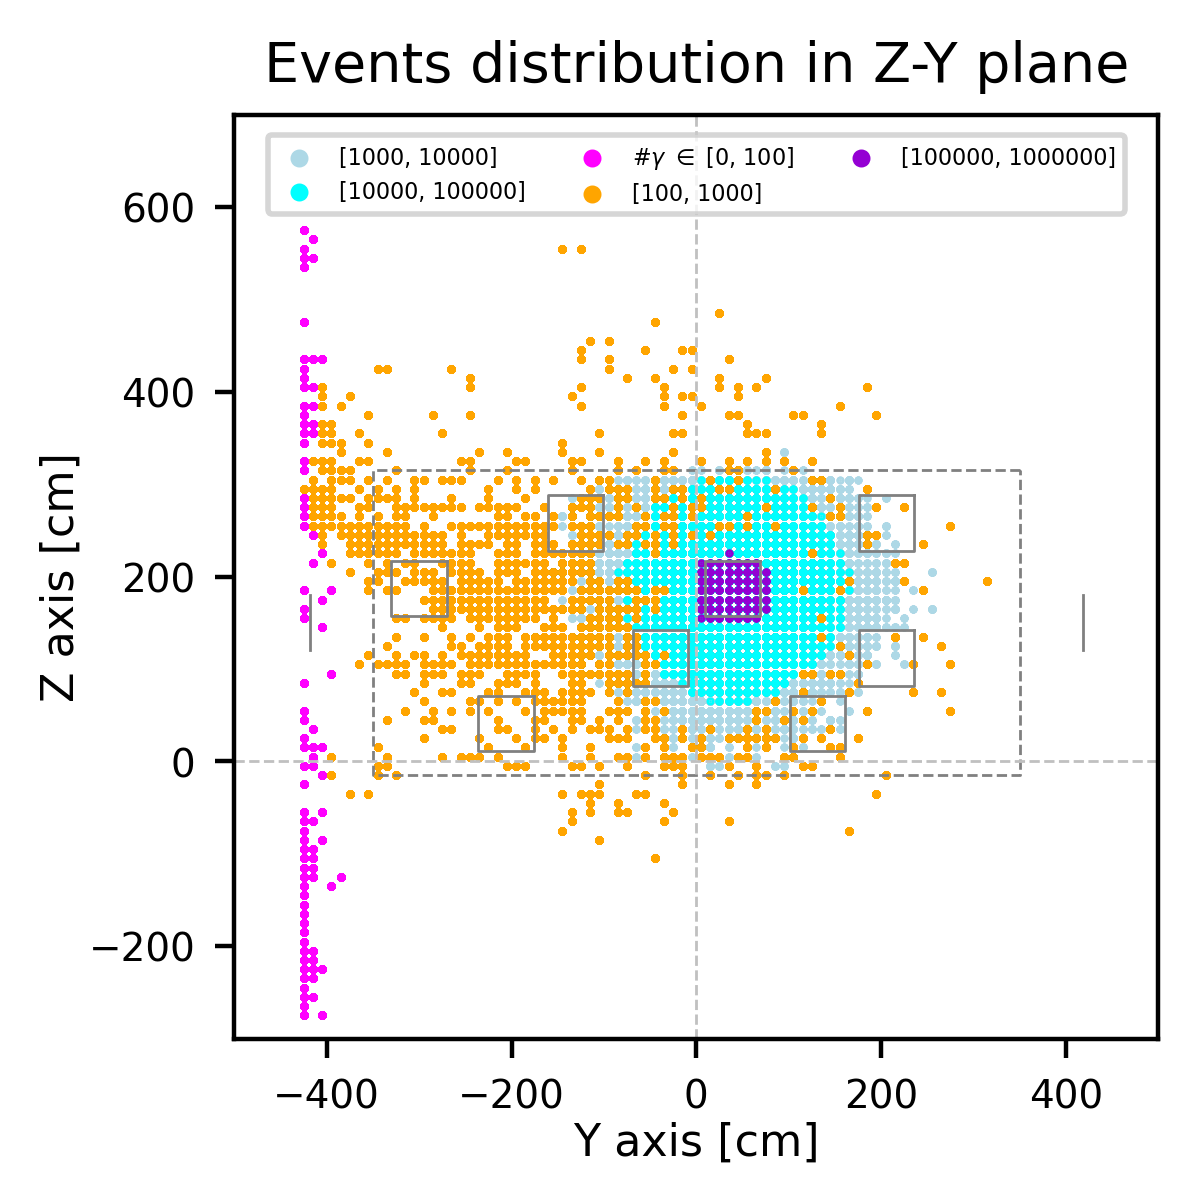

In [6]:
import matplotlib.pyplot as plt
import numpy as np

range100 = 0 #events numbers within [0, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for simu in emulValues:
    if simu <= 100:
        range100 += 1
        list100[0].append(emulValues.index(simu))
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(emulValues.index(simu))
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(emulValues.index(simu))
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(emulValues.index(simu))
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(emulValues.index(simu))
        list1000000[1].append(simu)
        
print("# event in [0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of [0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))



    
    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -400
xmax = 500
ymin = -500
ymax = 500
zmin = -300
zmax = 600

#X-Y plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [350, -350, -350, 350, 350]
cageXY_x = [340, 340, -340, -340, 340]
plt.plot(cageXY_y, cageXY_x, color="grey", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
plt.plot([418, 418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
plt.plot([-418, -418], [272, 332], color="grey", linewidth=0.5, linestyle='-')
plt.plot([418, 418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
plt.plot([-418, -418], [256, 196], color="grey", linewidth=0.5, linestyle='-')
plt.plot([418, 418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
plt.plot([-418, -418], [-177, -237], color="grey", linewidth=0.5, linestyle='-')
plt.plot([418, 418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')
plt.plot([-418, -418], [-253, -313], color="grey", linewidth=0.5, linestyle='-')

#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(ymin, ymax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(xmin, xmax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi1, yauxi2, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi1, xauxi2, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupY[2], groupX[2], c='lightblue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupY[3], groupX[3], c='cyan', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupY[0], groupX[0], c='magenta', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupY[1], groupX[1], c='orange', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupY[4], groupX[4], c='darkviolet', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('X axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in X-Y plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_XY.png', bbox_inches='tight')
plt.show()    
#---------------------------------------------------------





#X-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)

#Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [315, -15, -15, 315, 315]
cageXZ_x = [340, 340, -340, -340, 340]
plt.plot(cageXZ_z, cageXZ_x, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [zmin, zmax]
yauxi4 = [0, 0]
plt.plot(yauxi3, yauxi4, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [xmin, xmax]
plt.plot(xauxi3, xauxi4, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
op00z = [180, 120, 120, 180, 180]#From top right, anti-clockwise---
op00x = [332, 332, 272, 272, 332]
plt.plot(op00z, op00x, color="grey", linewidth=0.5, linestyle='-')
op02z = op00z
op02x = [256, 256, 196, 196, 256]
plt.plot(op02z, op02x, color="grey", linewidth=0.5, linestyle='-')
op16z = op00z
op16x = [-177, -177, -237, -237, -177]
plt.plot(op16z, op16x, color="grey", linewidth=0.5, linestyle='-')
op22z = op00z
op22x = [-253, -253, -313, -313, -253]
plt.plot(op22z, op22x, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupZ[2], groupX[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupX[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[0], groupX[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupZ[1], groupX[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[4], groupX[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(xmin, xmax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('X axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in X-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_XZ.png', bbox_inches='tight')
plt.show()    
#---------------------------------------------------------






#Z-Y plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


#Define the field cage frame, start from top right, anti-clockwise---
cageZY_y = [350, -350, -350, 350, 350]
cageZY_z = [315, 315, -15, -15, 315]
plt.plot(cageZY_y, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [ymin, ymax]
yauxi6 = [0, 0]
plt.plot(yauxi5, yauxi6, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [zmin, 700]
plt.plot(xauxi5, xauxi6, color="silver", linewidth=0.5, linestyle='--')

#Draw the membrane XArapucas---
plt.plot([418, 418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch0, 2, 16, 22---
plt.plot([-418, -418], [120, 180], color="grey", linewidth=0.5, linestyle='-')#opch1, 3, 17, 23---
op04y = [236, 176, 176, 236, 236]#From top right, anti-clockwise---
op04z = [288, 288, 228, 228, 288]
plt.plot(op04y, op04z, color="grey", linewidth=0.5, linestyle='-')
op05y = [-101, -161, -161, -101, -101]#From top right, anti-clockwise---
op05z = [288, 288, 228, 228, 288]
plt.plot(op05y, op05z, color="grey", linewidth=0.5, linestyle='-')
op06y = [69, 9, 9, 69, 69]#From top right, anti-clockwise---
op06z = [217, 217, 157, 157, 217]
plt.plot(op06y, op06z, color="grey", linewidth=0.5, linestyle='-')
op07y = [-270, -330, -330, -270, -270]#From top right, anti-clockwise---
op07z = [217, 217, 157, 157, 217]
plt.plot(op07y, op07z, color="grey", linewidth=0.5, linestyle='-')
op08y = op04y#From top right, anti-clockwise---
op08z = [142, 142, 82, 82, 142]
plt.plot(op08y, op08z, color="grey", linewidth=0.5, linestyle='-')
op09y = [-9, -69, -69, -9, -9]#From top right, anti-clockwise---
op09z = [142, 142, 82, 82, 142]
plt.plot(op09y, op09z, color="grey", linewidth=0.5, linestyle='-')
op10y = [161, 101, 101, 161, 161]#From top right, anti-clockwise---
op10z = [71, 71, 11, 11, 71]
plt.plot(op10y, op10z, color="grey", linewidth=0.5, linestyle='-')
op11y = [-176, -236, -236, -176, -176]#From top right, anti-clockwise---
op11z = [71, 71, 11, 11, 71]
plt.plot(op11y, op11z, color="grey", linewidth=0.5, linestyle='-')


#Drawing of data points------
plt.scatter(groupY[2], groupZ[2], c='lightblue', s=0.8, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupY[3], groupZ[3], c='cyan', s=0.8, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupY[0], groupZ[0], c='magenta', s=0.8, alpha=1.0, marker='.', label='#$\gamma$ $\in$ [0, 100]')
plt.scatter(groupY[1], groupZ[1], c='orange', s=0.8, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupY[4], groupZ[4], c='darkviolet', s=0.8, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(ymin, ymax)
plt.ylim(zmin, 700)
plt.xlabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-Y plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZY.png', bbox_inches='tight')
plt.show()    
#---------------------------------------------------------